In [191]:
import math
import matplotlib.pyplot as plt

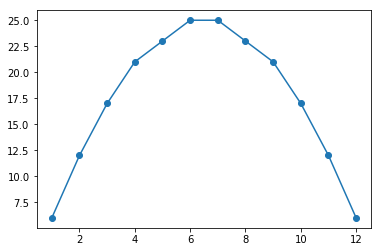

Row 1: sc 6 into a magic ring (6)
Row 2: inc 6 (12)
Row 3: inc, sc 2, inc, sc, inc, sc 2, inc, sc, inc, sc 1 (17)
Row 4: sc 2, [inc, sc 3] 3x, inc, sc 2 (21)
Row 5: inc, sc 10, inc, sc 9 (23)
Row 6: sc 5, inc, sc 10, inc, sc 6 (25)
Row 7: sc 25 (25)
Row 8: sc 5, dec, sc 10, dec, sc 6 (23)
Row 9: dec, sc 10, dec, sc 9 (21)
Row 10: sc, [dec, sc 3] 4x (17)
Row 11: dec, sc 2, dec, sc, dec, sc 2, dec, sc, dec, sc 1 (12)
Row 12: dec 6 (6)


In [204]:
# number of rows
nbrRows = 12
# starting number of stiches
firstRowStiches = 6

diameter = nbrRows + 1
firstRowCircumf = math.sin(1 * math.pi / (diameter))
stichesPerUnit = firstRowStiches / firstRowCircumf


rows = []
cols = []
for i in range(nbrRows):
    h = i + 1
    #  a=sqrt(h(2R-h))
    # circumference = 2 * math.pi * math.sqrt(h*(2*radius-h))
    theta = h * math.pi / (diameter)
    circumference = math.sin(theta)
    nbrStiches = round(circumference * stichesPerUnit)
    # print(str(h) + " " + str(nbrStiches))
    rows.append(nbrStiches)
    cols.append(h)

# fig = plt.figure()
# plt.plot(cols, rows, marker="o")
# plt.show()

for i in range(nbrRows):
    currentRow = cols[i]
    currentRowStitchCount = rows[i]
    if i is 0:
        print(f'Row {currentRow}: sc {currentRowStitchCount} into a magic ring ({currentRowStitchCount})')
    else:
        prevRowStitchCount = rows[i-1]
        diffInCount = currentRowStitchCount - prevRowStitchCount

        diffType = "inc" if diffInCount > 0 else "dec"
        scPerDiff = 1 if diffType == "inc" else 2
        numberOfDiffs = abs(diffInCount)
        numberOfSc = prevRowStitchCount - (numberOfDiffs * scPerDiff)

        # print(f'Row {currentRow}: {numberOfDiffs} {diffType} {numberOfSc} sc ({currentRowStitchCount})')

        lcm = (numberOfDiffs or 1) * (numberOfSc or 1)
        # print(lcm)
        offset = 0
        if (currentRow % 2 == 0 and numberOfDiffs):
            offset = round(prevRowStitchCount / numberOfDiffs / 2)

        # print(f'currentRow {currentRow}, offset {offset}')
        allStitches = []
        for j in range(lcm):
            indexToUse = j
            if offset:
                indexToUse = j + offset * numberOfDiffs
            if numberOfDiffs and indexToUse % (numberOfSc or 1) == 0:
                allStitches.append(diffType)
            if numberOfSc and indexToUse % (numberOfDiffs or 1) == 0:
                allStitches.append("sc")
        # print(allStitches)

        groupedStitches = []
        currentCount = 0
        currentType = ''
        for s in allStitches:
            if (currentCount and s != currentType):
                count = f' {currentCount}' if currentCount > 1 else ''
                groupedStitches.append(f'{currentType}{count}')
                currentCount = 0
            currentType = s
            currentCount +=1
        groupedStitches.append(f'{currentType} {currentCount}')
        # print(groupedStitches)

        doubleGroupedStitches = []
        buffer = []
        for g in groupedStitches:
            buffer.append(g)
            if g.startswith('sc'):
                doubleGroupedStitches.append(buffer)
                buffer = []
        if (len(buffer)):
            doubleGroupedStitches.append(buffer)

        # print(doubleGroupedStitches)

        finalGroups = []
        previousGroup = doubleGroupedStitches[0]
        groupCount = 0
        for d in doubleGroupedStitches:
            if previousGroup and d != previousGroup:
                finalGroups.append([previousGroup, groupCount])
                previousGroup = d
                groupCount = 0
            groupCount +=1
        finalGroups.append([previousGroup, groupCount])
        # print(finalGroups)

        # final printout
        instructionStr = ''
        for group in finalGroups:
            if group[1] == 1:
                instructionStr += ", ".join(group[0])
            else:
                instructionStr += f'[{", ".join(group[0])}]'
                instructionStr += f' {group[1]}x'
            if (group != finalGroups[-1]):
                instructionStr += ', '   

        print(f'Row {currentRow}: {instructionStr} ({currentRowStitchCount})')


In [205]:
Extra small:

Row 1: sc 5 into a magic ring (5)
Row 2: inc, sc, inc 3 (9)
Row 3: [inc, sc 2] 3x (12)
Row 4: sc 5, inc, sc 6 (13)
Row 5: dec, sc 11 (12)
Row 6: [dec, sc 2] 3x (9)
Row 7: dec, sc, dec 3 (5)

SyntaxError: invalid syntax (<ipython-input-205-8a6d63af1264>, line 1)

In [ ]:
Small

Row 1: sc 5 into a magic ring (5)
Row 2: inc 5 (10)
Row 3: inc, sc 3, [inc, sc 2] 2x (13)
Row 4: sc 3, inc, sc 5, inc, sc 3 (15)
Row 5: inc, sc 14 (16)
Row 6: sc 6, dec, sc 8 (15)
Row 7: dec, sc 6, dec, sc 5 (13)
Row 8: sc, [dec, sc 2] 3x (10)
Row 9: dec 5 (5)

In [ ]:
Medium

Row 1: sc 6 into a magic ring (6)
Row 2: inc 6 (12)
Row 3: [inc, sc 2] 4x (16)
Row 4: sc 2, [inc, sc 4] 2x, inc, sc 3 (19)
Row 5: inc, sc 9, inc, sc 8 (21)
Row 6: sc 21 (21)
Row 7: dec, sc 9, dec, sc 8 (19)
Row 8: sc 2, [dec, sc 4] 2x, dec, sc 3 (16)
Row 9: [dec, sc 2] 4x (12)
Row 10: dec 6 (6)

In [ ]:
Large

Row 1: sc 6 into a magic ring (6)
Row 2: inc 6 (12)
Row 3: inc, sc 2, inc, sc, inc, sc 2, inc, sc, inc, sc 1 (17)
Row 4: sc 2, [inc, sc 3] 3x, inc, sc 2 (21)
Row 5: inc, sc 10, inc, sc 9 (23)
Row 6: sc 5, inc, sc 10, inc, sc 6 (25)
Row 7: sc 25 (25)
Row 8: sc 5, dec, sc 10, dec, sc 6 (23)
Row 9: dec, sc 10, dec, sc 9 (21)
Row 10: sc, [dec, sc 3] 4x (17)
Row 11: dec, sc 2, dec, sc, dec, sc 2, dec, sc, dec, sc 1 (12)
Row 12: dec 6 (6)